In [70]:
import os 
import numpy as np
import librosa 
import json
import matplotlib.pyplot as plt
import cv2

def get_file_descriptors(dirpath):
        directory={}
        dataset_path=dirpath
        cwd= os.getcwd()
        for i , (dirpath, dirname, filename) in enumerate(os.walk(dataset_path)):
            if(dirpath!=dataset_path):
                dirname=dirpath.split("/")[-1]
                files={}
                file_list=[]
                index=0
                for file in filename:
                    filepath = os.path.join( dirpath, file)
                    if ( (filepath.endswith('.wav'))):
                        if(file.startswith('.')):
                            pass
                        else:
                            file_list.append(filepath)
                file_list.sort()
                if(len(file_list)>0):
                    for filepath in file_list:
                        files[index]=filepath
                        index+=1
                    directory[dirname]=files
        return directory


In [71]:
def tagstft(x,outfile_path):
    np.save(outfile_path,x)
    

def generateDataset(input_dir,outputdir,fft_len,spec_dims):
    fft_len=fft_len
    spec_dims=spec_dims
    directory=get_file_descriptors(input_dir)
    spec_dict={}
    for key in directory.keys():
        spec_dict[key]={}
        k=0
        print(key)
        for indx,filepath in enumerate(directory[key].values()):
            file,sr=librosa.load(filepath,duration=90,sr=8000)
            file=librosa.util.normalize(file)
            frames=librosa.stft(file, n_fft=fft_len, hop_length=fft_len//4, win_length=fft_len, window='hann', center=True, dtype=None, pad_mode='constant')
            i=0
            for j in range(0,(frames.shape[1]-spec_dims[1]),spec_dims[1]):
                filename=key+"_fileid_"+str(indx)+"_"+str(i)+".npy"
                out_file=os.path.join(outputdir,filename)
                y=frames[:,j:j+spec_dims[1]]
                tagstft(y,out_file)
                spec_dict[key][k]=out_file
                k+=1
                i+=1
    json_path="./daps_stft_LUT.json"
    json_directory = json.dumps(spec_dict,indent=4)
    with open(json_path, "w") as outfile:
        outfile.write(json_directory)

In [72]:
dir_path= "../dataset_daps/daps"
spec_dims=(256,64)
fft_len=511
generateDataset(dir_path,"../dataset_daps/daps/data_np256",fft_len=fft_len,spec_dims=spec_dims)

iphone_bedroom1
iphone_balcony1
ipad_confroom1
clean
iphone_livingroom1
ipad_confroom2
ipad_livingroom1
cleanraw
produced
ipadflat_office1
ipadflat_confroom1
ipad_office1
ipad_balcony1
ipad_bedroom1
sample
ipad_office2


In [66]:
ar=[]
inc=4
ar=np.zeros((spec_dims[0],spec_dims[1]*inc))
j=0
offset=21
for i in range(offset,offset+inc):
    a=np.load("../dataset_daps/daps/data_np/iphone_bedroom1_fileid_0_"+str(i)+".npy")
    ar[:,spec_dims[1]*j:spec_dims[1]*j+spec_dims[1]]=abs(a)
    j+=1

print(ar.shape)

(256, 256)


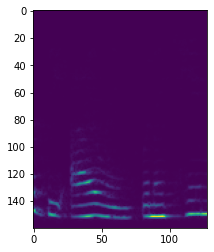

In [64]:
plt.figure()
plt.imshow(np.flip(abs(ar),axis=0))